In [2]:
import h5py

h = h5py.File('/data/GCE_sys/mod_c/mod_s_42_XCO_P8.hdf5')





In [10]:
for f in h['templates']:
    print f

brem
brem_0
energies
ics_cmb
ics_fir
ics_opt
pi0
pi0_0


[  2.00000000e+02   2.59931305e+02   3.37821442e+02   4.39051880e+02
   5.70616699e+02   7.41605713e+02   9.63832764e+02   1.25265161e+03
   1.62801697e+03   2.11586304e+03   2.74989526e+03   3.57391968e+03
   4.64486816e+03   6.03673340e+03   7.84568066e+03   1.01966904e+04
   1.32521963e+04   1.72233047e+04   2.23843809e+04   2.90920098e+04
   3.78096211e+04   4.91395234e+04   6.38645078e+04   8.30019297e+04
   1.07874000e+05   1.40199156e+05   1.82210766e+05   2.36811422e+05
   3.07773531e+05   3.99999906e+05   5.19862500e+05   6.75642750e+05
   8.78103562e+05]


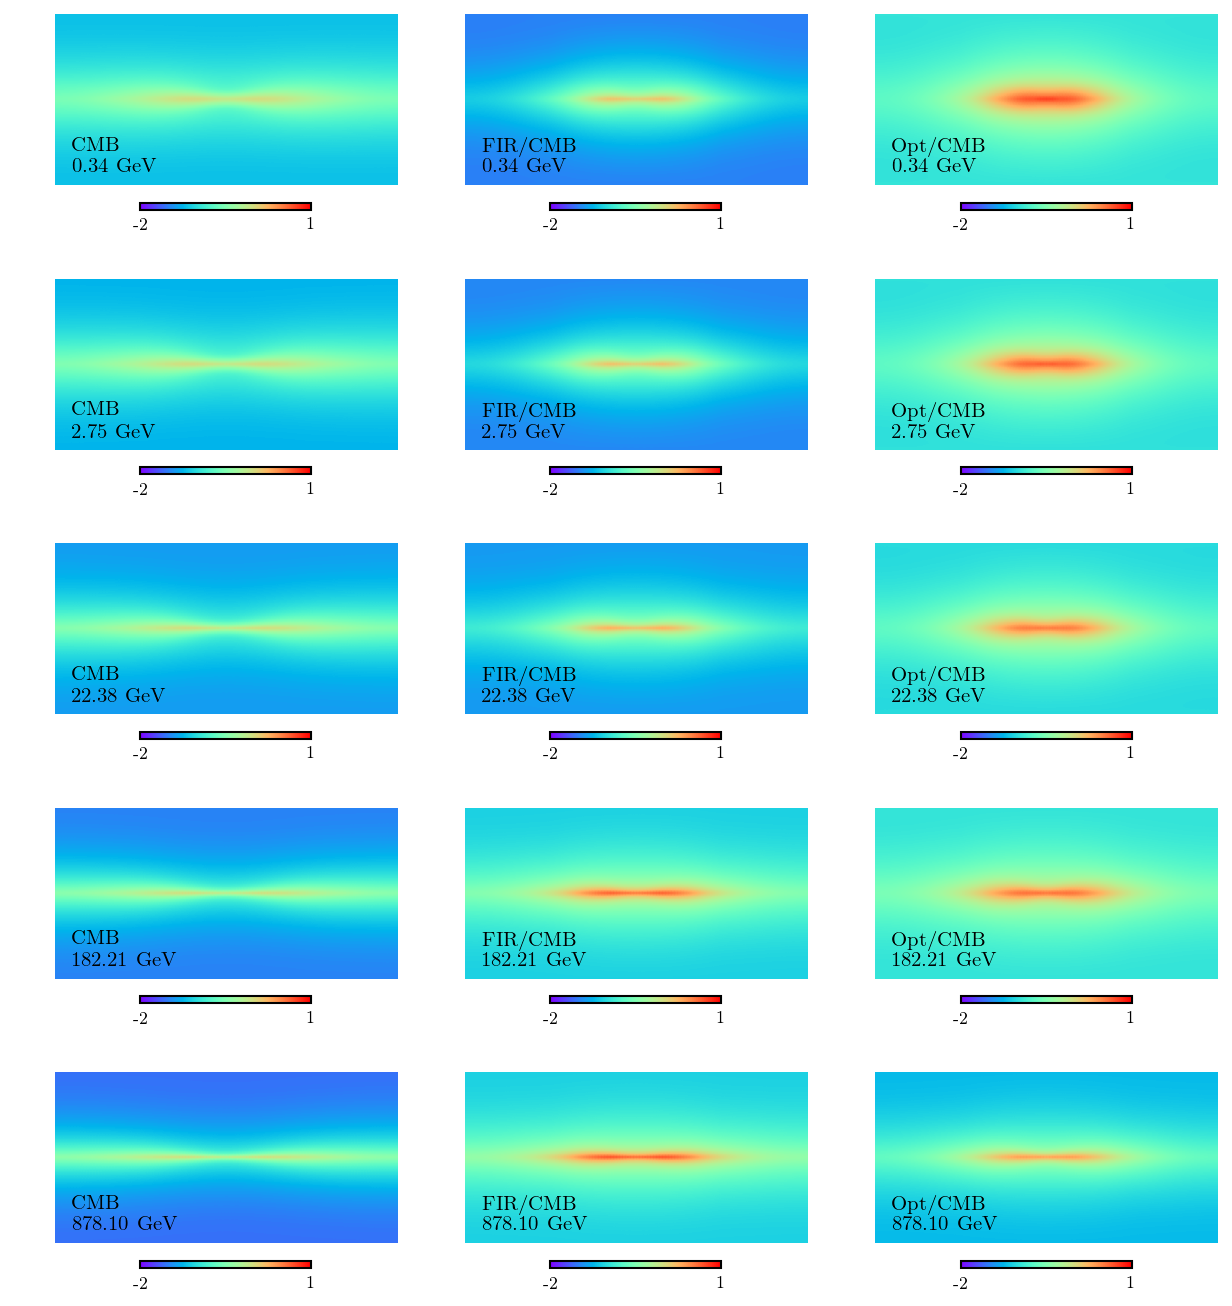

In [5]:
import healpy 

print h['templates/energies'][...]


def PlotText(ebin,label):
    E = h['templates/energies'][...][ebin]
    plt.text(.05,.075 , '%1.2f GeV'%(E/1e3), transform=plt.gca().transAxes, fontsize=10)
    plt.text(.05,.2 , label, transform=plt.gca().transAxes, fontsize=10)

plt.figure(figsize=(10,11))
for k, ebin in enumerate([2,10,18,26,32]):
    plt.subplot(5,3,k*3+1)
    healpy.cartview(np.log10(h['/templates/ics_cmb'][ebin]/np.max(h['/templates/ics_cmb'][ebin])),hold=True, min=-2, max=1, cmap='rainbow', title='')
    PlotText(ebin,label='CMB')
    plt.subplot(5,3,k*3+2)
    healpy.cartview(np.log10(h['/templates/ics_fir'][ebin]/np.max(h['/templates/ics_cmb'][ebin])),hold=True, min=-2, max=1, cmap='rainbow', title='')
    PlotText(ebin,label='FIR/CMB')
    plt.subplot(5,3,k*3+3)
    healpy.cartview(np.log10(h['/templates/ics_opt'][ebin]/np.max(h['/templates/ics_cmb'][ebin])),hold=True, min=-2, max=1, cmap='rainbow', title='')
    PlotText(ebin,label='Opt/CMB')
    
plt.subplots_adjust(wspace=-0.2, hspace=-1.2)

#plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/ICS_morphology.pdf', bbox_inches='tight')

In [1]:
import h5py
h = h5py.File('/data/GCE_sys/mod_c/mod_s_42_XCO_P8.hdf5')
h2 = h5py.File('/data/GCE_sys/mod_c/mod_s_46_XCO_P8.hdf5')


import healpy 

print h['templates/energies'][...]


def PlotText(ebin,label):
    E = h['templates/energies'][...][ebin]
    
    plt.subplot(5,3,k*3+2)
    plt.text(.05,.075 , '%1.2f GeV'%(E/1e3), transform=plt.gca().transAxes, fontsize=10)
    plt.text(.05,.15 , label, transform=plt.gca().transAxes, fontsize=10)

plt.figure(figsize=(10,11))




[  2.00000000e+02   2.59931305e+02   3.37821442e+02   4.39051880e+02
   5.70616699e+02   7.41605713e+02   9.63832764e+02   1.25265161e+03
   1.62801697e+03   2.11586304e+03   2.74989526e+03   3.57391968e+03
   4.64486816e+03   6.03673340e+03   7.84568066e+03   1.01966904e+04
   1.32521963e+04   1.72233047e+04   2.23843809e+04   2.90920098e+04
   3.78096211e+04   4.91395234e+04   6.38645078e+04   8.30019297e+04
   1.07874000e+05   1.40199156e+05   1.82210766e+05   2.36811422e+05
   3.07773531e+05   3.99999906e+05   5.19862500e+05   6.75642750e+05
   8.78103562e+05]


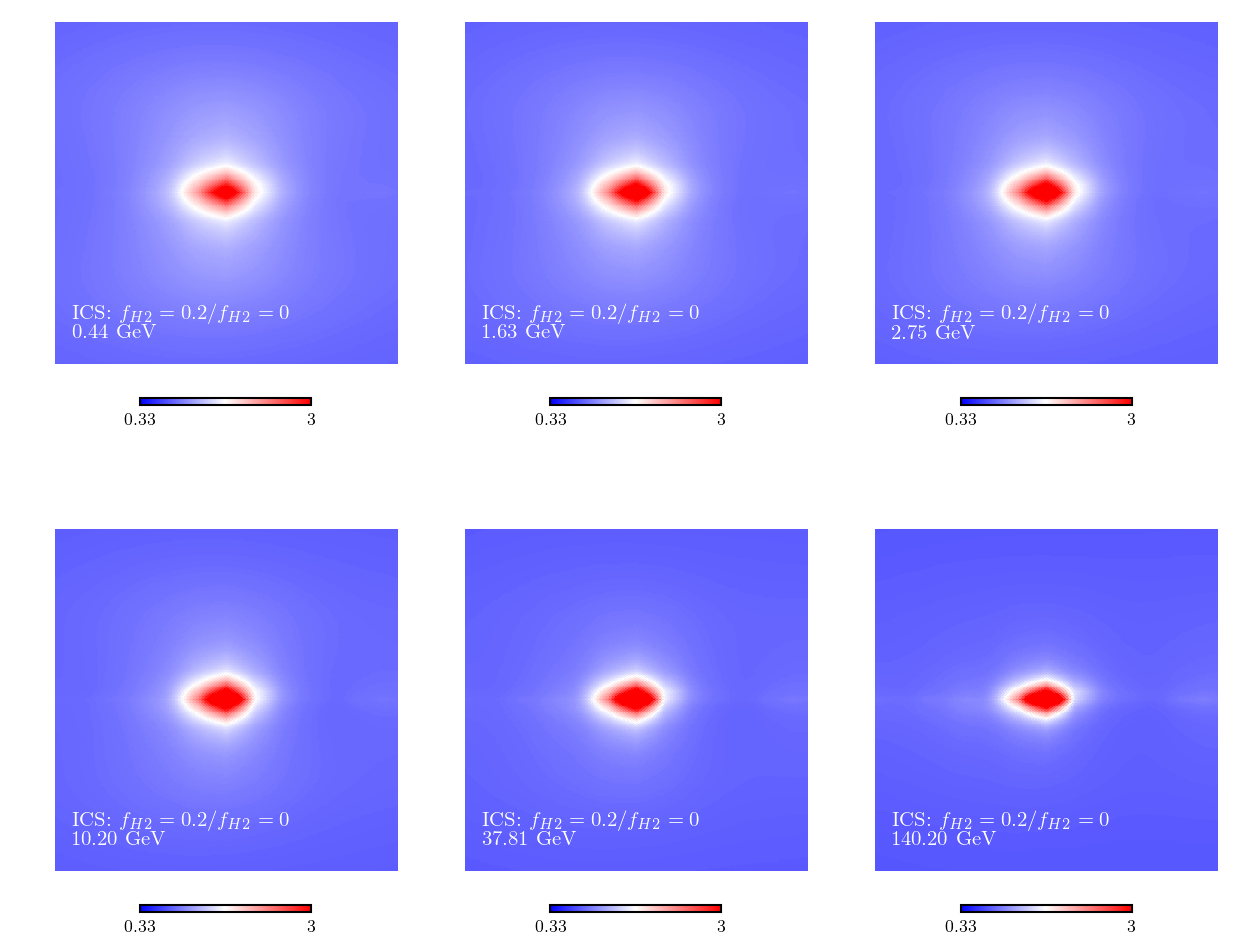

In [2]:
gal_gas = h['/templates/ics_cmb'][...]+h['/templates/ics_opt'][...]+h['/templates/ics_fir'][...]
PEB_gas = h2['/templates/ics_cmb'][...]+h2['/templates/ics_opt'][...]+h2['/templates/ics_fir'][...]
    
def PlotText(ebin,label):
    E = h['templates/energies'][...][ebin]
    plt.text(.05,.075 , '%1.2f GeV'%(E/1e3), transform=plt.gca().transAxes, fontsize=10, color='w')
    plt.text(.05,.125 , label, transform=plt.gca().transAxes, fontsize=10, color='w')
    
plt.figure(figsize=(10,8))
for plot, i in enumerate([3,8,10,15,20,25]):
    plt.subplot(2,3,plot+1)
    healpy.cartview((PEB_gas/gal_gas)[i], latra=(-20,20), lonra=[-20,20], hold=True,  title='', cmap='bwr', min=.33,max=3)
    PlotText(i,r'ICS: $f_{H2}=0.2/f_{H2}=0$')

#plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/ics_enhancement.pdf', bbox_inches='tight')




[ 2.1]
[ 1.5]
[ 1.1]


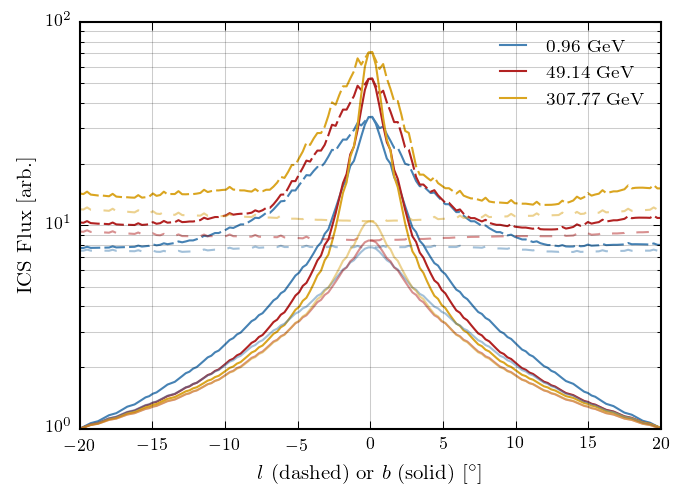

In [63]:
c = ['steelblue', 'firebrick', 'goldenrod', 'darkseagreen']

for i, ebin in enumerate([6,21,28]):
    fig = plt.figure(1)
    #m = healpy.cartview((PEB_gas/gal_gas)[ebin], latra=(-20,20), lonra=[-20,20], title='', cmap='bwr', xsize=400, return_projected_map=True, hold=True)
    
    m = healpy.cartview(PEB_gas[ebin], latra=(-20,20), lonra=[-20,20], title='', cmap='bwr', xsize=160, return_projected_map=True, hold=True)
    #m2 = healpy.cartview(gal_gas[ebin], latra=(-20,20), lonra=[-20,20], title='', cmap='bwr', xsize=160, return_projected_map=True, hold=True)
    
    fig.clf()
    plt.figure(0)
    plt.plot(np.linspace(-20,20,160), m[:,79]/m[0,79], label="%1.2f GeV"%(h['templates/energies'][...][ebin]/1e3), c=c[i])
    l, = plt.plot(np.linspace(-20,20,160), m[79,:]/m[0,79], c=c[i], ls='--')
    l.set_dashes([10,2])
    
#    plt.plot(np.linspace(-20,20,160), m2[:,79]/m2[0,79], label="%1.2f GeV"%(h['templates/energies'][...][ebin]/1e3), c=c[i], alpha=.5)
    above = np.argwhere( (m[:,79]/np.max(m[:,79]) > .3))
    fwhm = (above[-1]-above[0])*.1
    print fwhm
    
for i, ebin in enumerate([6,21,28]):
    fig = plt.figure(1)
    
    m2 = healpy.cartview(gal_gas[ebin], latra=(-20,20), lonra=[-20,20], title='', cmap='bwr', xsize=160, return_projected_map=True, hold=True)
    fig.clf()
    plt.figure(0)
    plt.plot(np.linspace(-20,20,160), m2[:,79]/m2[0,79], c=c[i], alpha=.5)    
    plt.plot(np.linspace(-20,20,160), m2[79,:]/m2[0,79], c=c[i], ls='--', alpha=0.5)
    
plt.legend(handles=handles, labels=labels, frameon=False)
plt.yscale('log')
plt.ylabel('ICS Flux [arb.]')
plt.xlabel(r'$l$ (dashed) or $b$ (solid) [$^\circ$]')
plt.grid(which='both', linestyle='-', alpha=.2)
plt.ylim(1,100)
#plt.vlines([-2,2],.1,200, linestyle='--', alpha=.3)

plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/GCE_Paper2_PRD/plots/ics_comparison.pdf', bbox_inches='tight')

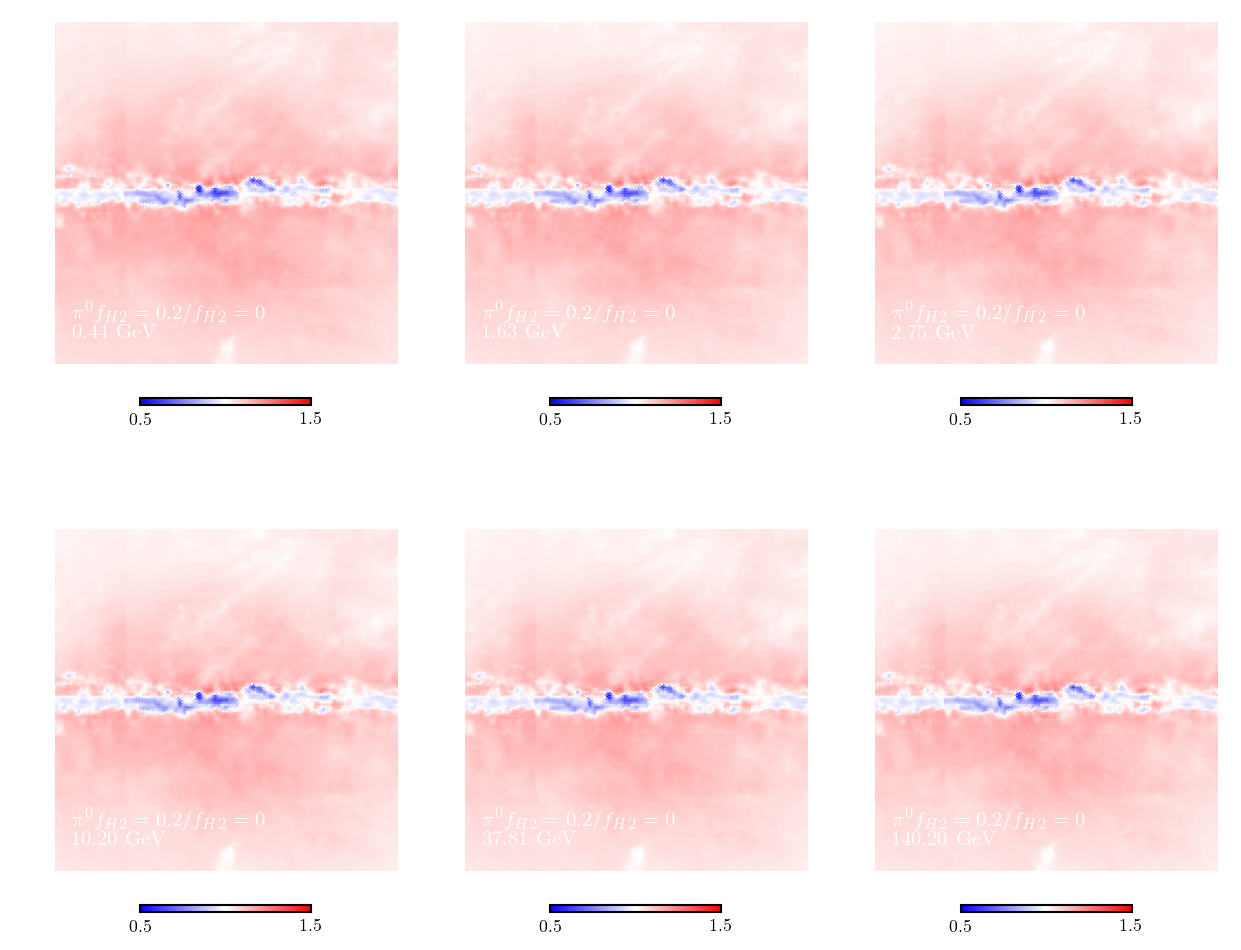

In [53]:
gal_gas = h['/templates/pi0'][...]
PEB_gas = h2['/templates/pi0'][...]
plt.figure(figsize=(10,8))
for plot, i in enumerate([3,8,10,15,20,25]):
    plt.subplot(2,3,plot+1)
    healpy.cartview((PEB_gas/gal_gas)[i], latra=(-20,20), lonra=[-20,20], hold=True,  title='', cmap='bwr', min=0.5, max=1.5)
    PlotText(i,r'$\pi^0 f_{H2}=0.2/f_{H2}=0$')
plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/pi0_enhancement.pdf', bbox_inches='tight')

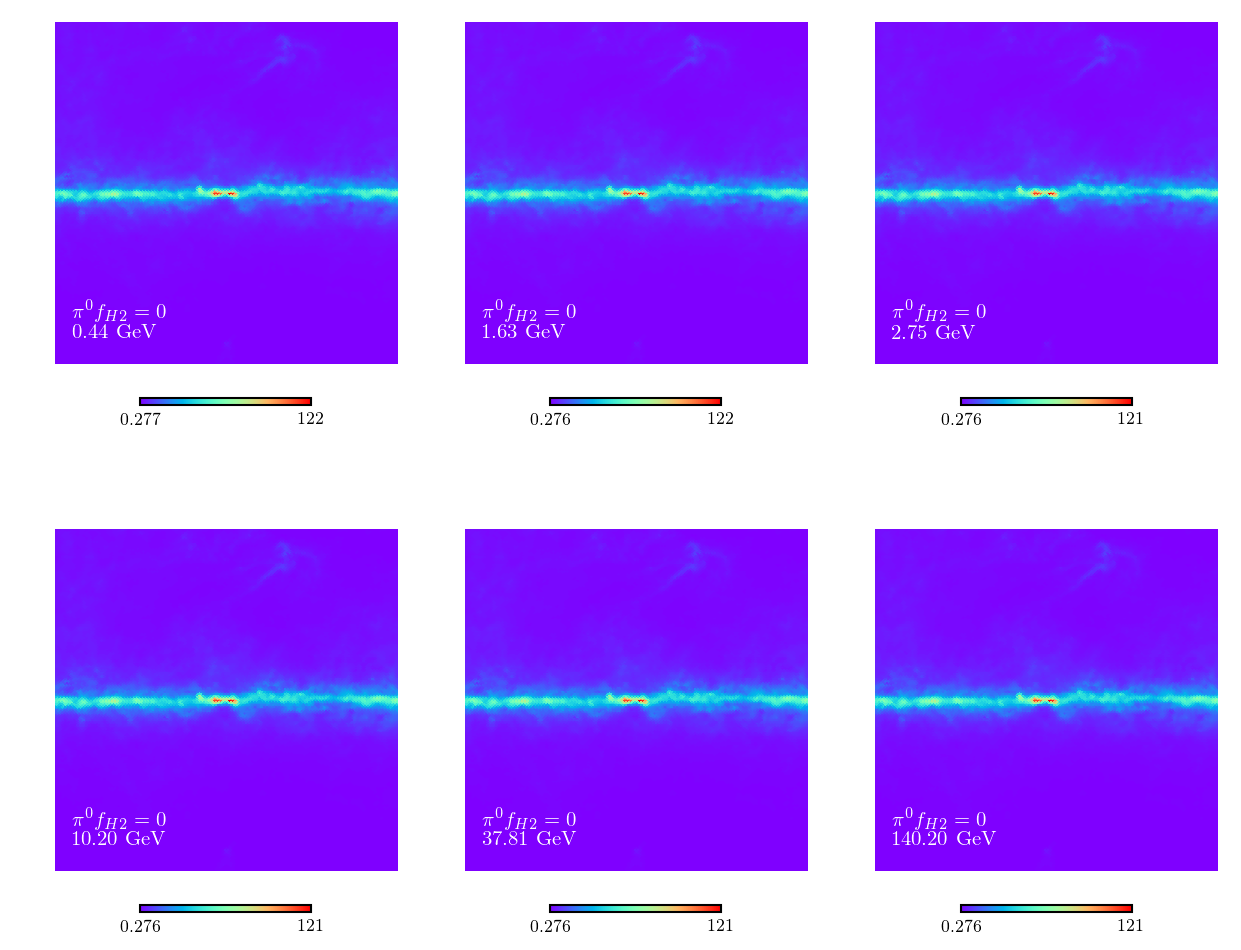

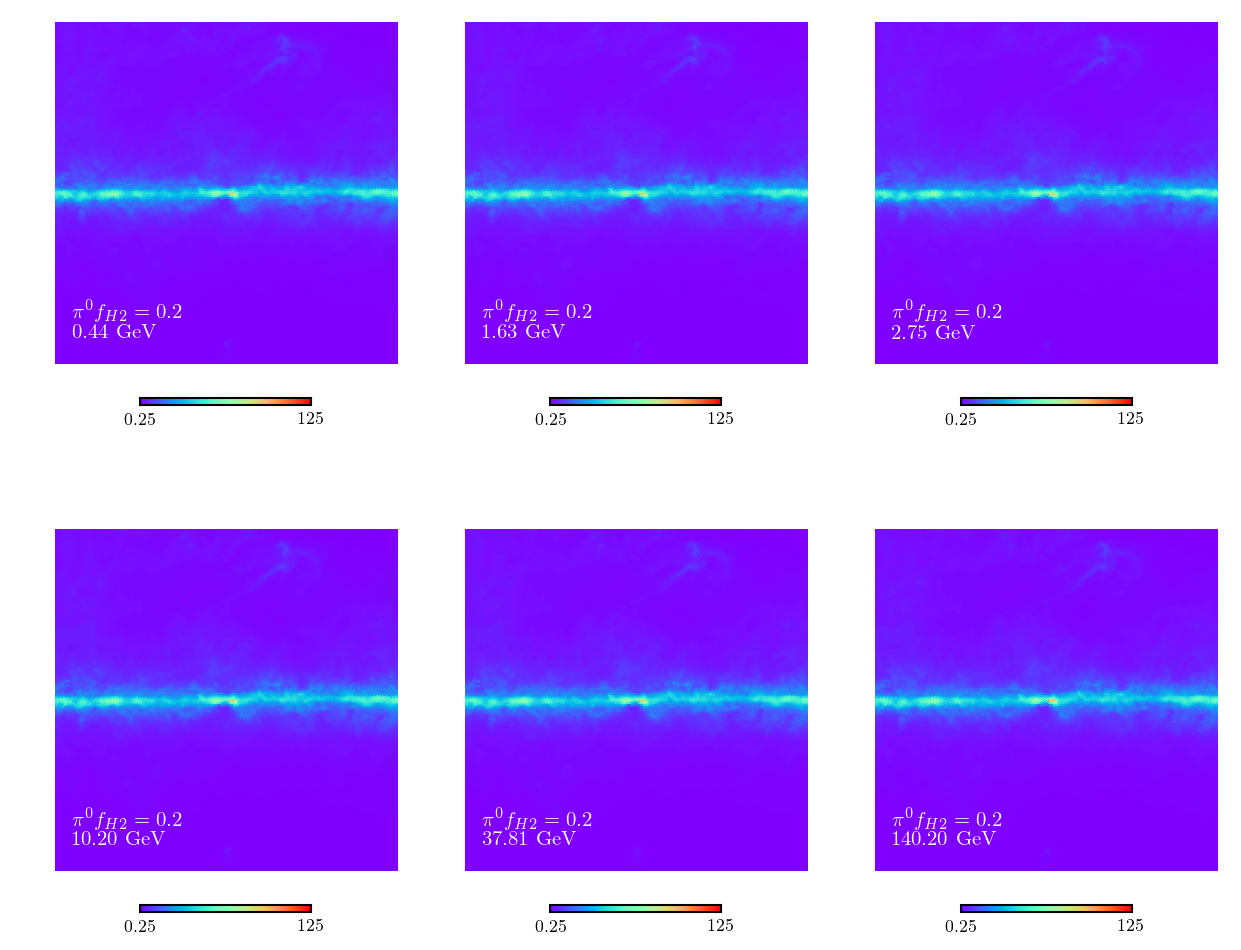

In [52]:
gal_gas = h['/templates/pi0'][...]
PEB_gas = h2['/templates/pi0'][...]
plt.figure(figsize=(10,8))
for plot, i in enumerate([3,8,10,15,20,25]):
    plt.subplot(2,3,plot+1)
    healpy.cartview((gal_gas)[i]/np.average(gal_gas[i]), latra=(-20,20), lonra=[-20,20], hold=True,  title='', cmap='rainbow')
    PlotText(i,r'$\pi^0 f_{H2}=0$')
    
plt.figure(figsize=(10,8))
for plot, i in enumerate([3,8,10,15,20,25]):
    plt.subplot(2,3,plot+1)
    healpy.cartview((PEB_gas)[i]/np.average(gal_gas[i]), latra=(-20,20), lonra=[-20,20], hold=True,  title='', cmap='rainbow', min=0.25, max=125)
    PlotText(i,r'$\pi^0 f_{H2}=0.2$')
#plt.savefig('/home/carlson/Dropbox/GCE_H2_Sources/plots/ics_enhancement.pdf', bbox_inches='tight')

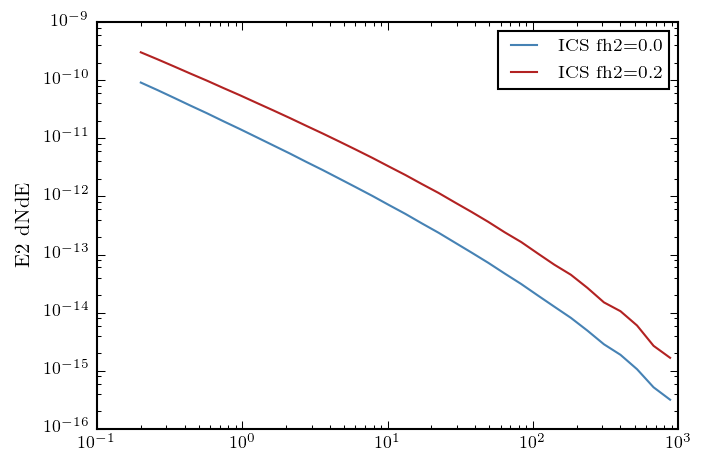

In [64]:
gal_gas = h['/templates/ics_cmb'][...]+h['/templates/ics_opt'][...]+h['/templates/ics_fir'][...]
PEB_gas = h2['/templates/ics_cmb'][...]+h2['/templates/ics_opt'][...]+h2['/templates/ics_fir'][...]


plt.loglog(h['/templates/energies'][...]/1e3, h['/templates/energies'][...]/1e3**2*gal_gas[:,391680],label='ICS fh2=0.0')
plt.loglog(h['/templates/energies'][...]/1e3, h['/templates/energies'][...]/1e3**2*PEB_gas[:,391680],label='ICS fh2=0.2')
plt.legend()

plt.ylabel('E2 dNdE')

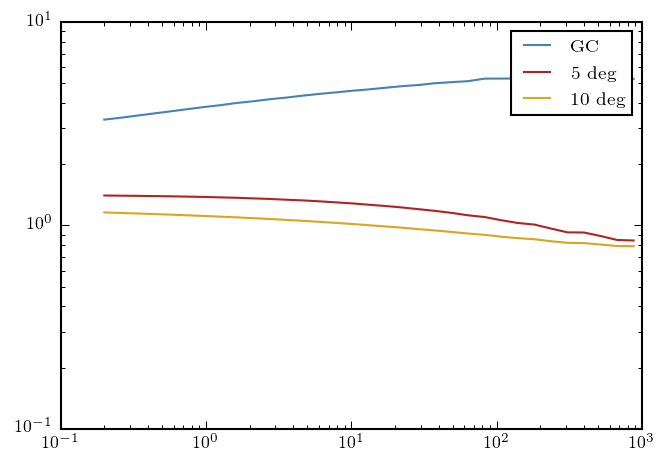

In [75]:

plt.loglog(h['/templates/energies'][...]/1e3, PEB_gas[:,391680]/gal_gas[:,391680],label='GC')

plt.loglog(h['/templates/energies'][...]/1e3, PEB_gas[:,358912]/gal_gas[:,358912],label='5 deg')

plt.loglog(h['/templates/energies'][...]/1e3, PEB_gas[:,324096]/gal_gas[:,324096],label='10 deg')
plt.legend()

In [74]:
Tools.ang2hpix(0,10,nside=256)

324096

In [69]:
np.log10(5)/np.log10(3.5)/2

0.64235531896633136